# ANALISIS DE SENTIMIENTO

## 1. CARGA DATOS

### 1.1. Conectar con Drive

In [1]:
# Conectar con el almacenamiento de GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1.2. Cargar data set: sports_normalized.csv

Cargar el data set que he guardado en el notebook de normalización en la ruta:

/content/drive/MyDrive/keepcoding_NLP/sports_normalized2.csv

Comprobar que se ha cargado correctamente.

In [ ]:
import pandas as pd
import numpy as np
data_sports = pd.read_csv('/content/drive/MyDrive/keepcoding_NLP/sports_normalized2.csv')
data_sports.head()


,Unnamed: 0,sentimiento,review
0,0,1,perfect size fit emergency preparedness backpa...
1,1,1,great wear pretty quick lot rinse son swim day...
2,2,1,great item superbly inexpensive performance
3,3,1,sturdily build portable practice net change re...
4,4,1,work good


### 1.3. Seleccionar características.

Ha guardado una columna llamada Unnamed que no nos sirve así que nos quedamos con las dos que vamos a necesitar, la de sentimiento y las reviews.

In [ ]:
data_sports = data_sports[['sentimiento', 'review']]
data_sports

,sentimiento,review
0,1,perfect size fit emergency preparedness backpa...
1,1,great wear pretty quick lot rinse son swim day...
2,1,great item superbly inexpensive performance
3,1,sturdily build portable practice net change re...
4,1,work good
...,...,...
29995,0,match description handle hinged lid temperatur...
29996,0,basic ring
29997,0,purchase knife far buy consider disposable use...
29998,0,flimsy


### 1.4. Análisis del dataset.

Tamaño:

In [ ]:
data_sports.shape

(30000, 2)

Datos faltantes y nulos:

In [ ]:
data_sports.isna().any()

sentimiento    False
review          True
dtype: bool

In [ ]:
data_sports.isnull().sum()

sentimiento      0
review         194
dtype: int64

Observamos que con la normalización hay 194 registros de review con nulos. Eliminamos nulos y duplicados:

### 1.5. Eliminación de registros nulos y duplicados:

In [ ]:
data_sports = data_sports.dropna().drop_duplicates()
data_sports.isna().any()

sentimiento    False
review         False
dtype: bool

Comprobar el nuevo del tamaño del data frame:

In [ ]:
data_sports.shape

(27932, 2)

### 1.6. Distribución de la variable objetivo:

In [ ]:
data_sports['sentimiento'].value_counts()

sentimiento
0    14439
1    13493
Name: count, dtype: int64

El valor 1 corresponde a reviews positivas y el valor 0 a reviews negativas.

Como se ha comentado en el notebook de análisis es un dataset desbalanceado donde predominan las reviews positivas.

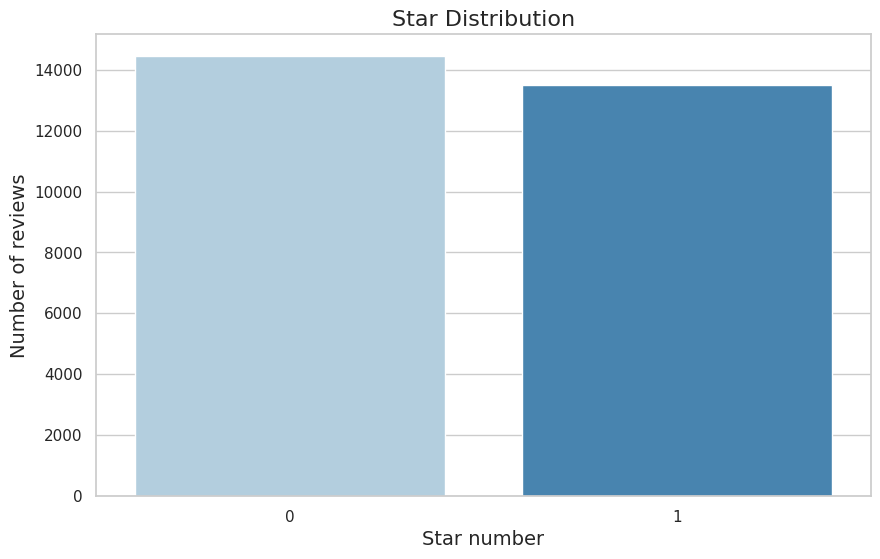

In [ ]:
# Visualización
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Configuración de estilo para los gráficos
sns.set(style="whitegrid")

# Crear el diagrama de barras
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='sentimiento', data=data_sports, palette='Blues', hue='sentimiento', dodge=False, legend=False)

# Añadir etiquetas y título
ax.set_title('Star Distribution', fontsize=16)
ax.set_xlabel('Star number', fontsize=14)
ax.set_ylabel('Number of reviews', fontsize=14)

# Mostrar el gráfico
plt.show()

## 2. SEPARACION TRAIN/TEST

### 2.1. Separación train/test

Separamos en dos partes: Train y Test donde el test es el 20% de los datos del dataset.

Estratificamos por la variable objetivo para repartir los datos de forma más equilibrada.

In [ ]:
from sklearn.model_selection import train_test_split
# Dividir train test
train, test = train_test_split(data_sports, test_size=0.2, stratify=data_sports['sentimiento'], random_state=42)


### 2.2. Guardar train y test en archivos separados.

In [ ]:
train.to_csv('/content/drive/MyDrive/keepcoding_NLP/sports_train2.csv')
test.to_csv('/content/drive/MyDrive/keepcoding_NLP/sports_test2.csv')

### 2.3. Comprobar el reparto de la variable objetivo:

In [ ]:
print(train.shape)
train['sentimiento'].value_counts()

(22345, 2)


sentimiento
0    11551
1    10794
Name: count, dtype: int64

In [ ]:
print(test.shape)
test['sentimiento'].value_counts()

(5587, 2)


sentimiento
0    2888
1    2699
Name: count, dtype: int64

### 2.4. Funcion para imprimir metricas

In [8]:
def print_metricas(pred, y_train):
  print('Matriz de confusion en Train:')
  cm = confusion_matrix(y_train, pred)
  print(cm)
  target_names = ['0', '1']
  # Graficar la matriz de confusión
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

  print('---------------------------------------------')
  print('Metricas en Train:')
  print(classification_report(y_train, pred))

## 3. MODELO DE REGRESIÓN LINEAL.

## 3.1. Carga de librerias

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

import warnings
warnings.filterwarnings('ignore')

## 3.2. Carga datasets de train y test.

In [3]:
train = pd.read_csv('/content/drive/MyDrive/keepcoding_NLP/sports_train2.csv')
test = pd.read_csv('/content/drive/MyDrive/keepcoding_NLP/sports_test2.csv')

## 3.3. Función para guardar modelos .pkl

In [7]:
def save_pkl(df,file_name, path='/content/drive/MyDrive/keepcoding_NLP/'):
  rute = path + file_name
  with open(rute, 'wb') as f:
    pickle.dump(df, f)


## 3.4. Preparación de características y variable objetivo.

In [5]:
X_train = train['review']
y_train = train['sentimiento']

X_test = test['review']
y_test = test['sentimiento']


# Guardar los conjuntos de datos
save_pkl(y_train, 'y_train2.pkl')
save_pkl(X_train, 'X_train2.pkl')
save_pkl(y_test, 'y_test2.pkl')
save_pkl(X_test, 'X_test2.pkl')


## 3.5. Normalización con CountVectorizer y TfidfVectorizer.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Función para evaluar diferentes valores de max_features
def evaluate_max_features(max_features_list, reviews, labels):
    results = {}
    for max_features in max_features_list:
        cv = CountVectorizer(ngram_range=(1, 3), max_features=max_features, max_df=0.95, min_df=5)
        X = cv.fit_transform(reviews)
        model = MultinomialNB()
        scores = cross_val_score(model, X, labels, cv=5)
        results[max_features] = scores.mean()
    return results

# Lista de valores de max_features a evaluar
max_features_list = [100, 500, 1000, 2000, 5000]

# Evaluar diferentes valores de max_features
results = evaluate_max_features(max_features_list, X_train, y_train)

# Mostrar resultados
for max_features, score in results.items():
    print(f"max_features: {max_features}, score: {score}")


max_features: 100, score: 0.7072723204296263
max_features: 500, score: 0.7624524502125756
max_features: 1000, score: 0.7748489594987692
max_features: 2000, score: 0.7784291787872007
max_features: 5000, score: 0.7825016782277915


Con esta validación parece que 5000 arroja mejores reultados podríamos comprobar más opciones pero por un tema computacional vamos a elegir 1000 features.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# CountVectorizer simple
count_simple = CountVectorizer()
X_train_cv_simple = count_simple.fit_transform(X_train)
X_test_cv_simple = count_simple.transform(X_test)

# Guardar las matrices transformadas
save_pkl(X_train_cv_simple, 'X_train_cv_simple2.pkl')
save_pkl(X_test_cv_simple, 'X_test_cv_simple2.pkl')

# CountVectorizer con ngrams, max_features, min_df y max_df
cv_complex = CountVectorizer(ngram_range=(1, 3), max_features=1000, max_df=0.95, min_df=5)
X_train_cv_complex = cv_complex.fit_transform(X_train)
X_test_cv_complex = cv_complex.transform(X_test)

save_pkl(X_train_cv_complex, 'X_train_cv_complex2.pkl')
save_pkl(X_test_cv_complex, 'X_test_cv_complex2.pkl')

# TfIdfVectorizer simple
tfidf_simple = TfidfVectorizer()
X_train_tfidf_simple = tfidf_simple.fit_transform(X_train)
X_test_tfidf_simple = tfidf_simple.transform(X_test)

save_pkl(X_train_tfidf_simple, 'X_train_tfidf_simple2.pkl')
save_pkl(X_test_tfidf_simple, 'X_test_tfidf_simple2.pkl')

# TfIdfVectorizer complejo
tfidf_complex = TfidfVectorizer(ngram_range=(1, 3), max_features=1000, max_df=0.95, min_df=5)
X_train_tfidf_complex = tfidf_complex.fit_transform(X_train)
X_test_tfidf_complex = tfidf_complex.transform(X_test)

save_pkl(X_train_tfidf_complex, 'X_train_tfidf_complex2.pkl')
save_pkl(X_test_tfidf_complex, 'X_test_tfidf_complex2.pkl')


## 3.6. Funcion entrenamiento Regresión lineal.

In [ ]:
def model_lr(X_train, y_train, C, f):
  param_grid = {'C': C}
  model = LogisticRegression()
  # Crear el objeto GridSearchCV con LogisticRegression
  grid = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy')

  # Realizar el ajuste
  grid.fit(X_train, y_train)

  save_pkl(grid, f)

  pred = grid.predict(X_train)
  print_metricas(pred, y_train)

  # Imprimir los mejores parámetros encontrados
  print("Best parameters: {}".format(grid.best_params_))



## 3.7. Entrenamiento modelo counterVectorizer simple

Matriz de confusion en Train:
[[9869 1682]
 [1872 8922]]


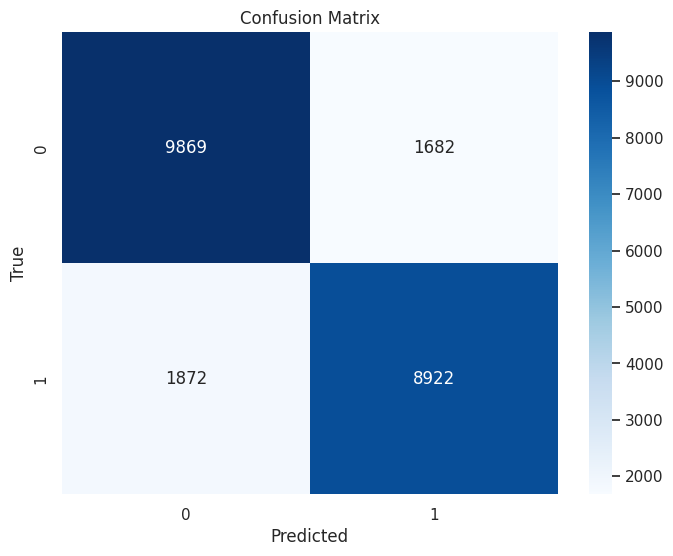

---------------------------------------------
Metricas en Train:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85     11551
           1       0.84      0.83      0.83     10794

    accuracy                           0.84     22345
   macro avg       0.84      0.84      0.84     22345
weighted avg       0.84      0.84      0.84     22345

Best parameters: {'C': 0.08858667904100823}


In [ ]:
C_vector = np.logspace(-4, 4, 20)
file_model = 'lr_model_cv_simple2.pkl'
model_lr(X_train_cv_simple,
         y_train,
         C_vector,
         file_model)


## 3.8. Entrenamiento modelo counterVectorizer complejo.

Matriz de confusion en Train:
[[9539 2012]
 [2497 8297]]


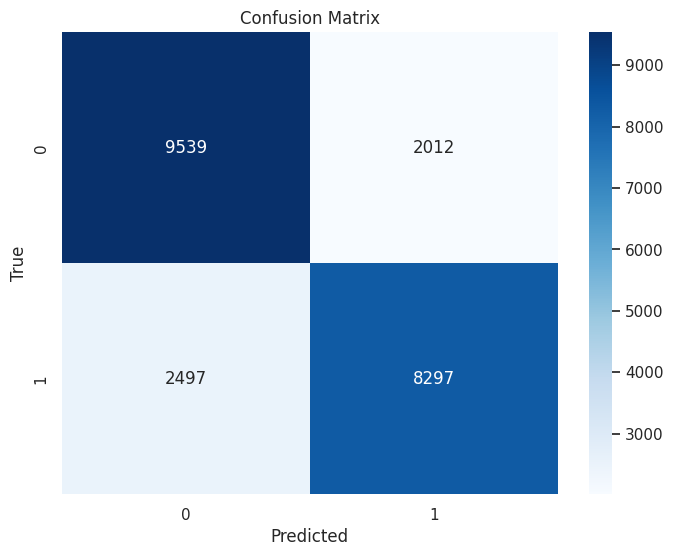

---------------------------------------------
Metricas en Train:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81     11551
           1       0.80      0.77      0.79     10794

    accuracy                           0.80     22345
   macro avg       0.80      0.80      0.80     22345
weighted avg       0.80      0.80      0.80     22345

Best parameters: {'C': 0.03359818286283781}


In [ ]:
C_vector = np.logspace(-4, 4, 20)
file_model = 'lr_model_cv_complex2.pkl'
model_lr(X_train_cv_complex,
         y_train,
         C_vector,
         file_model)

## 3.9. Entrenamiento modelo tfidfVectorizer simple

Matriz de confusion en Train:
[[9993 1558]
 [2178 8616]]


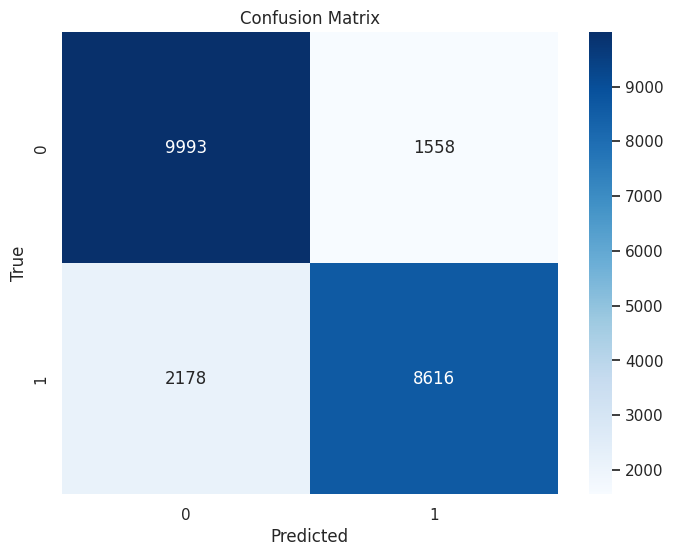

---------------------------------------------
Metricas en Train:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84     11551
           1       0.85      0.80      0.82     10794

    accuracy                           0.83     22345
   macro avg       0.83      0.83      0.83     22345
weighted avg       0.83      0.83      0.83     22345

Best parameters: {'C': 0.4832930238571752}


In [ ]:
C_vector = np.logspace(-6, 6, 20)
file_model = 'lr_model_tfidf_simple2.pkl'
model_lr(X_train_tfidf_simple,
         y_train,
         C_vector,
         file_model)


## 3.10 Entrenamiento modelo tfidfVectorizer complejo.

Matriz de confusion en Train:
[[9658 1893]
 [2469 8325]]


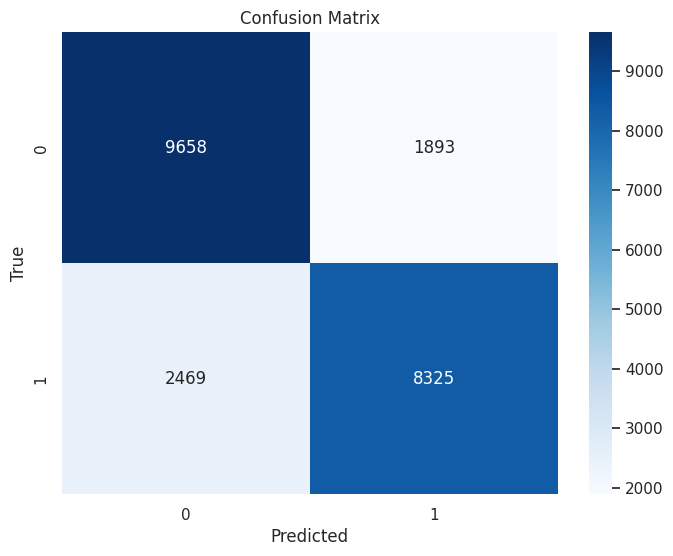

---------------------------------------------
Metricas en Train:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82     11551
           1       0.81      0.77      0.79     10794

    accuracy                           0.80     22345
   macro avg       0.81      0.80      0.80     22345
weighted avg       0.81      0.80      0.80     22345

Best parameters: {'C': 0.4832930238571752}


In [ ]:
C_vector = np.logspace(-6, 6, 20)
file_model = 'lr_model_tfidf_complex2.pkl'
model_lr(X_train_tfidf_complex,
         y_train,
         C_vector,
         file_model)

# 4. MODELO K-NEIGHBOURS

## 4.1. Funcion entrenar modelo KN-Neighbours.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np

def model_knn(X_train, y_train, N, f):
  param_grid = {
    'n_neighbors': N,
  }
  grid = GridSearchCV(KNeighborsClassifier(),
                      scoring= 'accuracy',
                      param_grid=param_grid, cv = 5, verbose=2)

  grid.fit(X_train, y_train)

  save_pkl(grid, f)

  pred = grid.predict(X_train)
  print_metricas(pred, y_train)

  print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
  print("best parameters: {}".format(grid.best_params_))

  scores = np.array(grid.cv_results_['mean_test_score'])
  stdvalues = np.array(grid.cv_results_['std_test_score'])

  plt.figure(figsize=(10, 6))
  plt.plot(N, scores, '-o')
  plt.errorbar(N, scores, yerr=stdvalues, fmt='o', ecolor='g', capsize=5)
  plt.xlabel('# Neighbors')
  plt.ylabel('5-Fold Accuracy')
  plt.title('K-Neighbors Classifier Performance')
  plt.grid()
  plt.show()

  print("acc (train): {:.2f}".format(grid.score(X_train, y_train)))

## 4.2. Entrenamiento modelo counterVectorizer simple.

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ......................................n_neighbors=1; total time=   9.5s
[CV] END ......................................n_neighbors=1; total time=   3.1s
[CV] END ......................................n_neighbors=1; total time=   3.1s
[CV] END ......................................n_neighbors=1; total time=   3.8s
[CV] END ......................................n_neighbors=1; total time=   3.2s
[CV] END ......................................n_neighbors=2; total time=   3.2s
[CV] END ......................................n_neighbors=2; total time=   3.2s
[CV] END ......................................n_neighbors=2; total time=   3.6s
[CV] END ......................................n_neighbors=2; total time=   3.9s
[CV] END ......................................n_neighbors=2; total time=   3.1s
[CV] END ......................................n_neighbors=3; total time=   3.4s
[CV] END ......................................

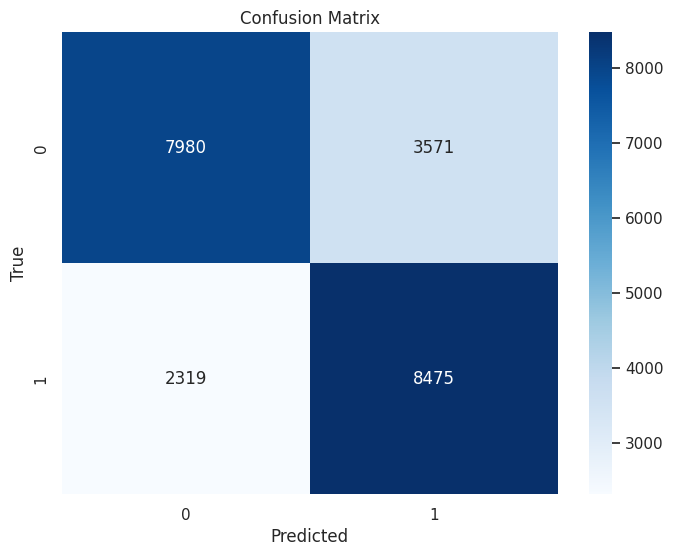

---------------------------------------------
Metricas en Train:
              precision    recall  f1-score   support

           0       0.77      0.69      0.73     11551
           1       0.70      0.79      0.74     10794

    accuracy                           0.74     22345
   macro avg       0.74      0.74      0.74     22345
weighted avg       0.74      0.74      0.74     22345

best mean cross-validation score: 0.676
best parameters: {'n_neighbors': 14}


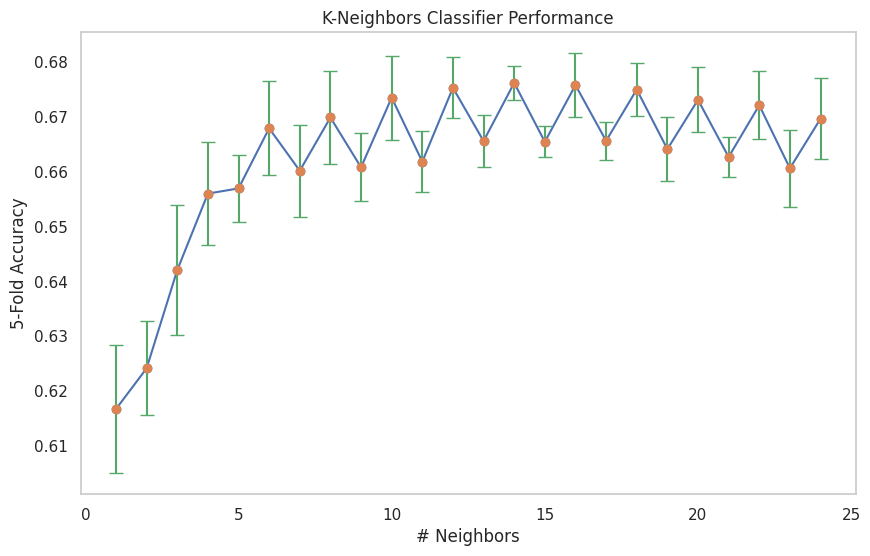

acc (train): 0.74


In [ ]:
neighbours = np.arange(1, 25, 1)
file_model = 'model_knn_cv_simple2.pkl'
model_knn(X_train_cv_simple, y_train, neighbours,file_model)


## 4.3. Entrenamiento modelo counterVectorizer complejo.

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ......................................n_neighbors=1; total time=   3.3s
[CV] END ......................................n_neighbors=1; total time=   3.0s
[CV] END ......................................n_neighbors=1; total time=   3.7s
[CV] END ......................................n_neighbors=1; total time=   3.3s
[CV] END ......................................n_neighbors=1; total time=   3.0s
[CV] END ......................................n_neighbors=2; total time=   3.3s
[CV] END ......................................n_neighbors=2; total time=   3.8s
[CV] END ......................................n_neighbors=2; total time=   4.1s
[CV] END ......................................n_neighbors=2; total time=   3.5s
[CV] END ......................................n_neighbors=2; total time=   3.3s
[CV] END ......................................n_neighbors=3; total time=   3.6s
[CV] END ......................................n

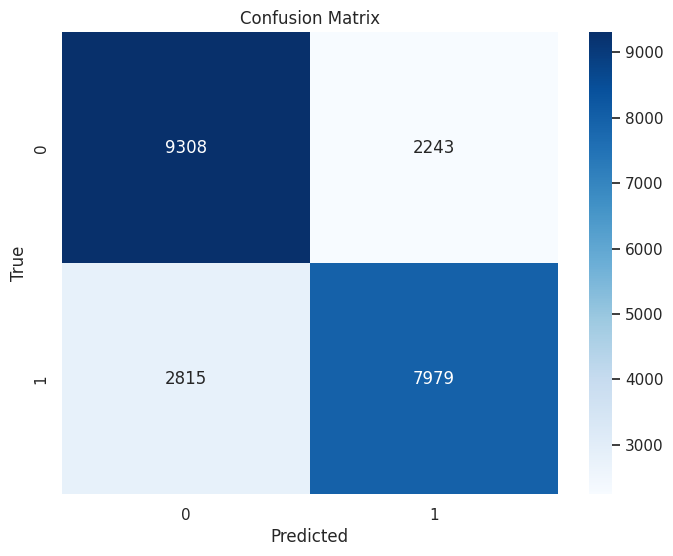

---------------------------------------------
Metricas en Train:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79     11551
           1       0.78      0.74      0.76     10794

    accuracy                           0.77     22345
   macro avg       0.77      0.77      0.77     22345
weighted avg       0.77      0.77      0.77     22345

best mean cross-validation score: 0.672
best parameters: {'n_neighbors': 6}


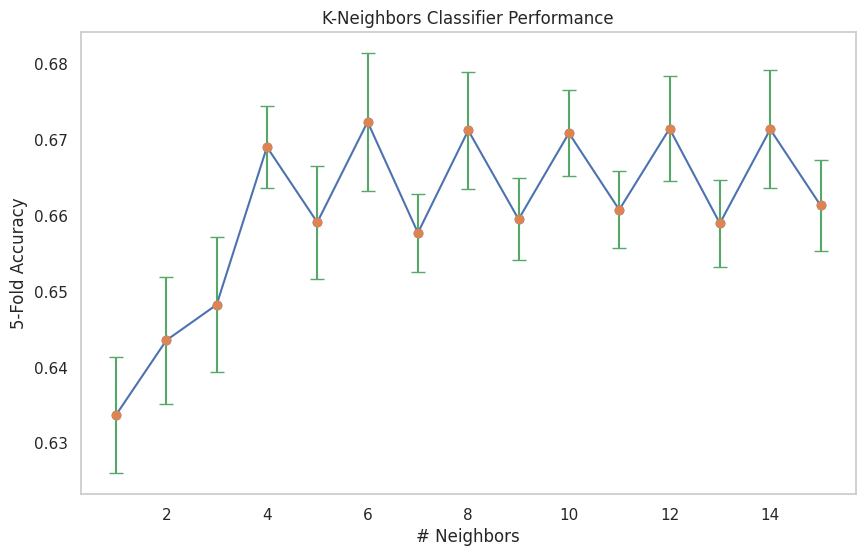

acc (train): 0.77


In [ ]:
neighbours = np.arange(1, 16, 1)
file_model = 'model_knn_cv_complex2.pkl'
model_knn(X_train_cv_complex,
          y_train,
          neighbours,
          file_model)

## 4.4. Entrenamiento modelo tfidfVectorizer simple.

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ......................................n_neighbors=1; total time=  45.8s
[CV] END ......................................n_neighbors=1; total time=  46.1s
[CV] END ......................................n_neighbors=1; total time=  44.3s
[CV] END ......................................n_neighbors=1; total time=  43.6s
[CV] END ......................................n_neighbors=1; total time=  42.7s
[CV] END ......................................n_neighbors=2; total time=  43.7s
[CV] END ......................................n_neighbors=2; total time=  46.5s
[CV] END ......................................n_neighbors=2; total time=  43.0s
[CV] END ......................................n_neighbors=2; total time=  48.9s
[CV] END ......................................n_neighbors=2; total time=  43.4s
[CV] END ......................................n_neighbors=3; total time=  43.1s
[CV] END ......................................n

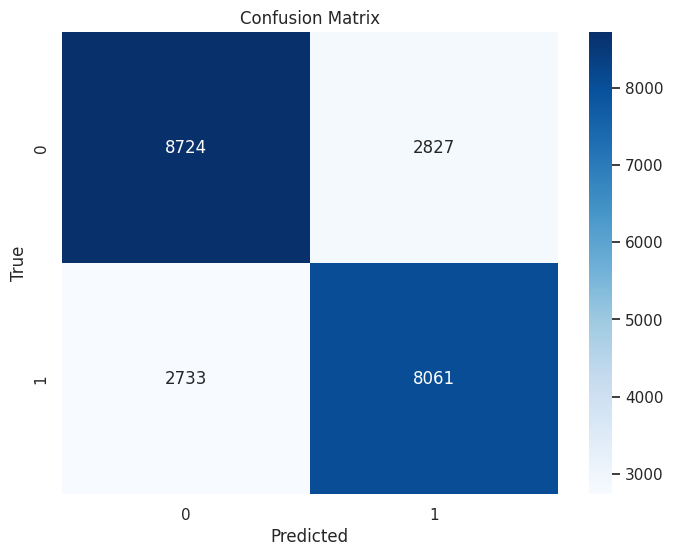

---------------------------------------------
Metricas en Train:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76     11551
           1       0.74      0.75      0.74     10794

    accuracy                           0.75     22345
   macro avg       0.75      0.75      0.75     22345
weighted avg       0.75      0.75      0.75     22345

best mean cross-validation score: 0.689
best parameters: {'n_neighbors': 14}


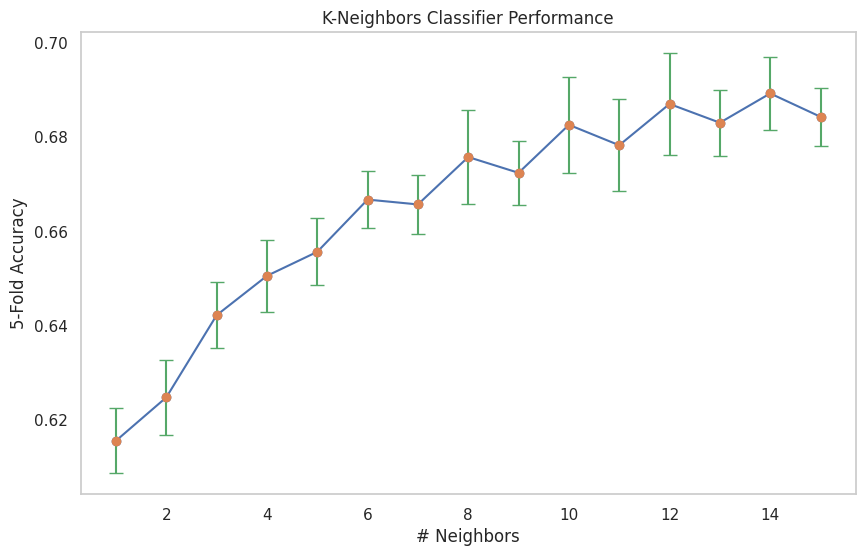

acc (train): 0.75


In [ ]:
neighbours = np.arange(1,16, 1)
file_model = 'model_knn_tfidf_simple2.pkl'
model_knn(X_train_tfidf_simple,
          y_train,
          neighbours,
          file_model)

## 4.5. Entrenamiento modelo tfidfVectorizer complejo.

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ......................................n_neighbors=1; total time=  30.7s
[CV] END ......................................n_neighbors=1; total time=  28.8s
[CV] END ......................................n_neighbors=1; total time=  28.3s
[CV] END ......................................n_neighbors=1; total time=  29.3s
[CV] END ......................................n_neighbors=1; total time=  26.9s
[CV] END ......................................n_neighbors=2; total time=  28.2s
[CV] END ......................................n_neighbors=2; total time=  30.3s
[CV] END ......................................n_neighbors=2; total time=  29.1s
[CV] END ......................................n_neighbors=2; total time=  28.6s
[CV] END ......................................n_neighbors=2; total time=  27.8s
[CV] END ......................................n_neighbors=3; total time=  27.8s
[CV] END ......................................n

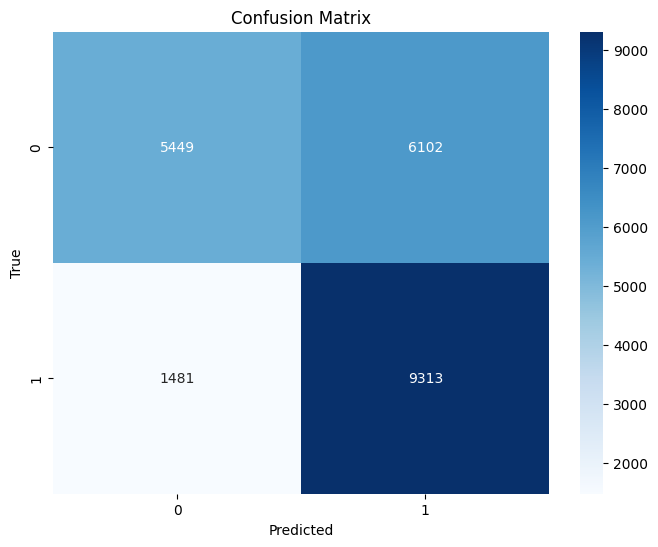

---------------------------------------------
Metricas en Train:
              precision    recall  f1-score   support

           0       0.79      0.47      0.59     11551
           1       0.60      0.86      0.71     10794

    accuracy                           0.66     22345
   macro avg       0.70      0.67      0.65     22345
weighted avg       0.70      0.66      0.65     22345

best mean cross-validation score: 0.564
best parameters: {'n_neighbors': 4}


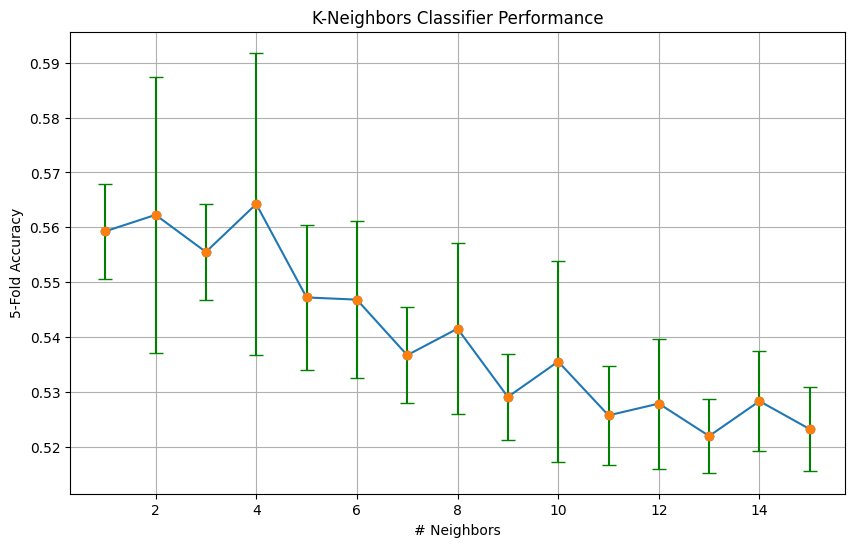

acc (train): 0.66


In [ ]:
neighbours = np.arange(1, 16, 1)
file_model = 'model_knn_tfidf_complex2.pkl'
model_knn(X_train_tfidf_complex,
          y_train,
          neighbours,
          file_model)

# 5. MODEL SVM

## 5.1. Funcion entrenar modelo SVM

In [9]:
from sklearn.svm import SVC

def model_svm(kernel, X, y, C, G, f):
  param_grid = {'C': C, 'gamma': G}

  grid = GridSearchCV(SVC(kernel=kernel),
                      scoring='accuracy',
                      param_grid=param_grid,
                      cv=2,
                      verbose=2)

  grid.fit(X,y)
  save_pkl(grid,f)
  pred = grid.predict(X)
  print_metricas(pred,y)

  print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
  print("best parameters: {}".format(grid.best_params_))

  # Mostramos prestaciones en CV
  scores = grid.cv_results_['mean_test_score'].reshape(len(C),len(G))

  plt.figure(figsize=(10,6))
  plt.imshow(scores, interpolation='nearest', vmin= 0.6, vmax=0.9)
  plt.xlabel('log(gamma)')
  plt.ylabel('log(C)')
  plt.colorbar()
  plt.xticks(np.arange(len(G)), np.log10(G), rotation=90)
  plt.yticks(np.arange(len(C)), np.log10(C))
  plt.title('2-fold accuracy')
  plt.show()

## 5.2.Entrenamient modelo CounterVectorizer simple

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV] END ..................................C=0.01, gamma=0.1; total time= 1.0min
[CV] END ..................................C=0.01, gamma=0.1; total time= 1.0min
[CV] END ..................C=0.01, gamma=0.16681005372000587; total time= 1.0min
[CV] END ..................C=0.01, gamma=0.16681005372000587; total time= 1.1min
[CV] END ...................C=0.01, gamma=0.2782559402207124; total time= 1.0min
[CV] END ...................C=0.01, gamma=0.2782559402207124; total time= 1.1min
[CV] END ..................C=0.01, gamma=0.46415888336127786; total time= 1.1min
[CV] END ..................C=0.01, gamma=0.46415888336127786; total time= 1.1min
[CV] END ....................C=0.01, gamma=0.774263682681127; total time= 1.1min
[CV] END ....................C=0.01, gamma=0.774263682681127; total time= 1.1min
[CV] END ....................C=0.01, gamma=1.291549665014884; total time= 1.3min
[CV] END ....................C=0.01, gamma=1.2

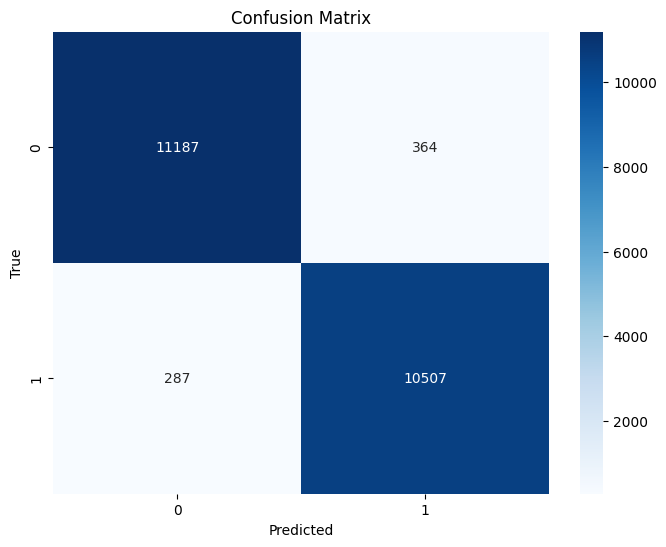

---------------------------------------------
Metricas en Train:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11551
           1       0.97      0.97      0.97     10794

    accuracy                           0.97     22345
   macro avg       0.97      0.97      0.97     22345
weighted avg       0.97      0.97      0.97     22345

best mean cross-validation score: 0.737
best parameters: {'C': 1.6681005372000592, 'gamma': 0.1}


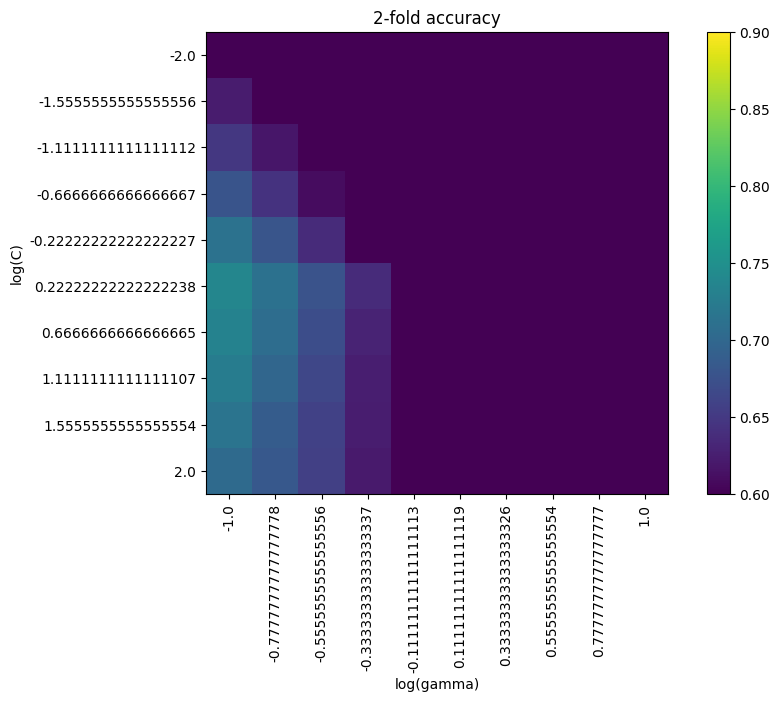

In [ ]:
vectorC = np.logspace(-2, 2, 10)
vectorG = np.logspace(-1, 1, 10)
kernel = 'rbf'
file_model = 'svm_model_cv_simple2.pkl'
model_svm(kernel, X_train_cv_simple, y_train, vectorC, vectorG, file_model)

## 5.3. Entramiento modelo counterVectorizer complejo.

In [8]:
vectorC = np.logspace(-2, 2, 10)
vectorG = np.logspace(-1, 1, 10)
kernel = 'rbf'
file_model = 'svm_model_cv_complex2.pkl'
model_svm(kernel, X_train_cv_complex, y_train, vectorC, vectorG, file_model)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV] END ..................................C=0.01, gamma=0.1; total time=  47.1s
[CV] END ..................................C=0.01, gamma=0.1; total time=  42.5s
[CV] END ..................C=0.01, gamma=0.16681005372000587; total time=  42.7s
[CV] END ..................C=0.01, gamma=0.16681005372000587; total time=  42.6s
[CV] END ...................C=0.01, gamma=0.2782559402207124; total time=  42.9s
[CV] END ...................C=0.01, gamma=0.2782559402207124; total time=  43.1s
[CV] END ..................C=0.01, gamma=0.46415888336127786; total time=  45.5s
[CV] END ..................C=0.01, gamma=0.46415888336127786; total time=  45.0s
[CV] END ....................C=0.01, gamma=0.774263682681127; total time=  48.8s
[CV] END ....................C=0.01, gamma=0.774263682681127; total time=  47.1s
[CV] END ....................C=0.01, gamma=1.291549665014884; total time=  49.4s
[CV] END ....................C=0.01, gamma=1.2

NameError: name 'print_metricas' is not defined

In [12]:
def load_pkl(file_name, path='/content/drive/MyDrive/keepcoding_NLP/'):
  rute = path + file_name
  with open(rute, 'rb') as file:
    data = pickle.load(file)
  return data

Matriz de confusion en Train:
[[9308 2243]
 [2815 7979]]


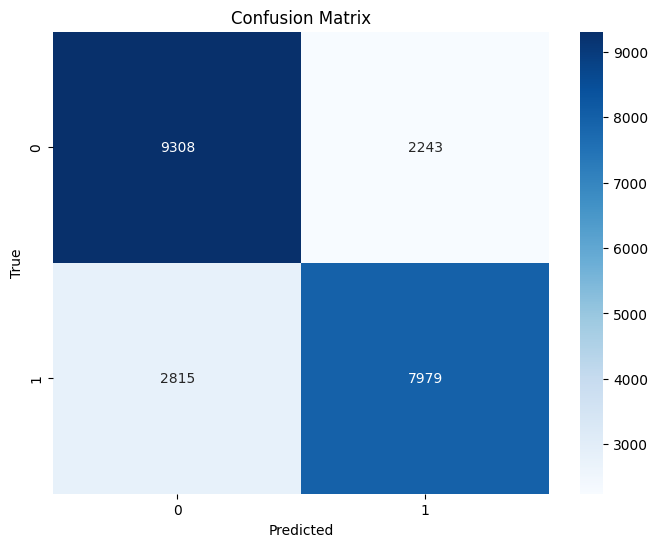

---------------------------------------------
Metricas en Train:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79     11551
           1       0.78      0.74      0.76     10794

    accuracy                           0.77     22345
   macro avg       0.77      0.77      0.77     22345
weighted avg       0.77      0.77      0.77     22345

best mean cross-validation score: 0.672
best parameters: {'n_neighbors': 6}


In [14]:
grid = load_pkl('model_knn_cv_complex2.pkl')
pred = grid.predict(X_train_cv_complex)
print_metricas(pred,y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))



## 5.4. Entrenamiento modelo tfidfVectorizer simple

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV] END ..................................C=0.01, gamma=0.1; total time=  55.7s
[CV] END ..................................C=0.01, gamma=0.1; total time=  56.1s
[CV] END ..................C=0.01, gamma=0.16681005372000587; total time=  53.5s
[CV] END ..................C=0.01, gamma=0.16681005372000587; total time=  56.0s
[CV] END ...................C=0.01, gamma=0.2782559402207124; total time=  56.8s
[CV] END ...................C=0.01, gamma=0.2782559402207124; total time=  55.2s
[CV] END ..................C=0.01, gamma=0.46415888336127786; total time=  53.6s
[CV] END ..................C=0.01, gamma=0.46415888336127786; total time=  55.9s
[CV] END ....................C=0.01, gamma=0.774263682681127; total time=  56.4s
[CV] END ....................C=0.01, gamma=0.774263682681127; total time=  56.0s
[CV] END ....................C=0.01, gamma=1.291549665014884; total time=  56.1s
[CV] END ....................C=0.01, gamma=1.2

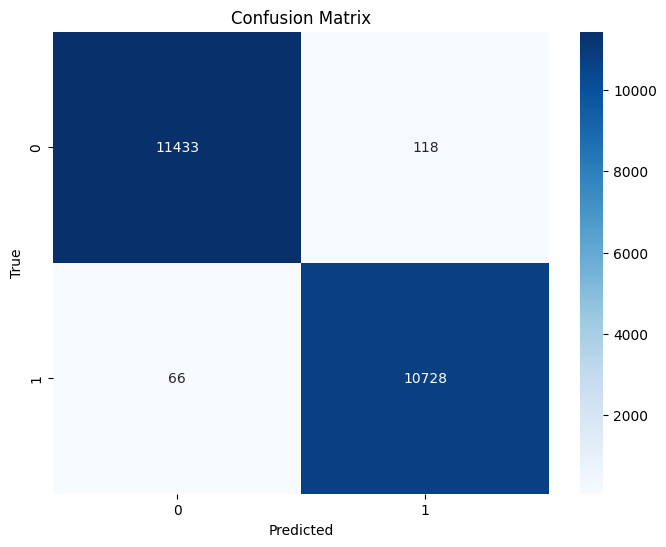

---------------------------------------------
Metricas en Train:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11551
           1       0.99      0.99      0.99     10794

    accuracy                           0.99     22345
   macro avg       0.99      0.99      0.99     22345
weighted avg       0.99      0.99      0.99     22345

best mean cross-validation score: 0.785
best parameters: {'C': 1.6681005372000592, 'gamma': 1.291549665014884}


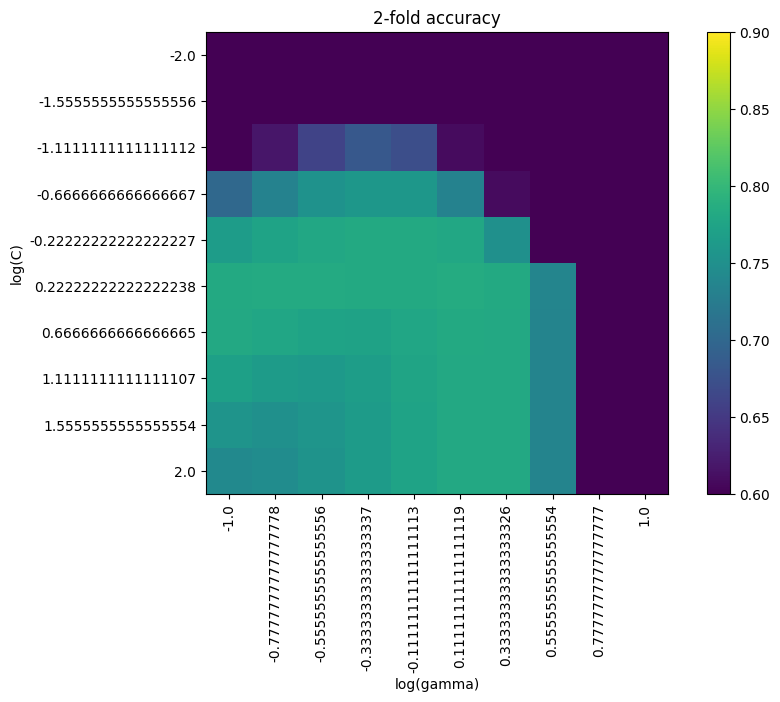

In [10]:
vectorC = np.logspace(-2, 2, 10)
vectorG = np.logspace(-1, 1, 10)
kernel = 'rbf'
file_model = 'svm_model_tdidf_simple2.pkl'
model_svm(kernel, X_train_tfidf_simple, y_train, vectorC, vectorG, file_model)

## 5.5. Entrenamiento modelo tfidfVectorizer complejo.

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV] END ..................................C=0.01, gamma=0.1; total time=  49.8s
[CV] END ..................................C=0.01, gamma=0.1; total time=  48.0s
[CV] END ..................C=0.01, gamma=0.16681005372000587; total time=  48.2s
[CV] END ..................C=0.01, gamma=0.16681005372000587; total time=  49.1s
[CV] END ...................C=0.01, gamma=0.2782559402207124; total time=  47.2s
[CV] END ...................C=0.01, gamma=0.2782559402207124; total time=  51.0s
[CV] END ..................C=0.01, gamma=0.46415888336127786; total time=  49.8s
[CV] END ..................C=0.01, gamma=0.46415888336127786; total time=  48.1s
[CV] END ....................C=0.01, gamma=0.774263682681127; total time=  48.4s
[CV] END ....................C=0.01, gamma=0.774263682681127; total time=  53.2s
[CV] END ....................C=0.01, gamma=1.291549665014884; total time=  48.3s
[CV] END ....................C=0.01, gamma=1.2

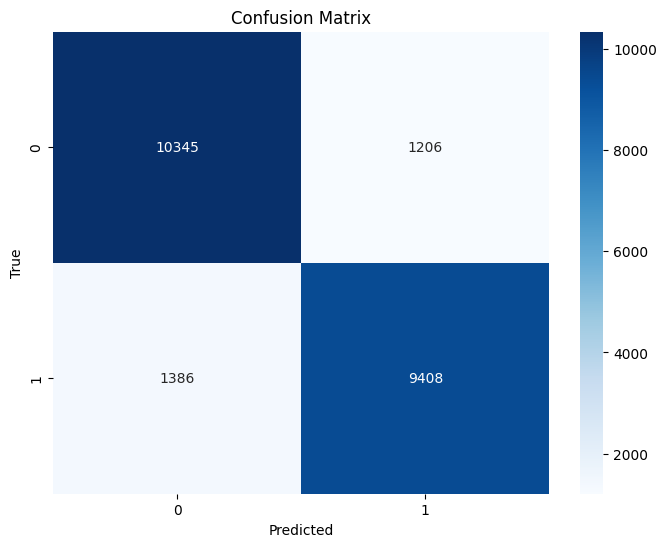

---------------------------------------------
Metricas en Train:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     11551
           1       0.89      0.87      0.88     10794

    accuracy                           0.88     22345
   macro avg       0.88      0.88      0.88     22345
weighted avg       0.88      0.88      0.88     22345

best mean cross-validation score: 0.780
best parameters: {'C': 1.6681005372000592, 'gamma': 0.46415888336127786}


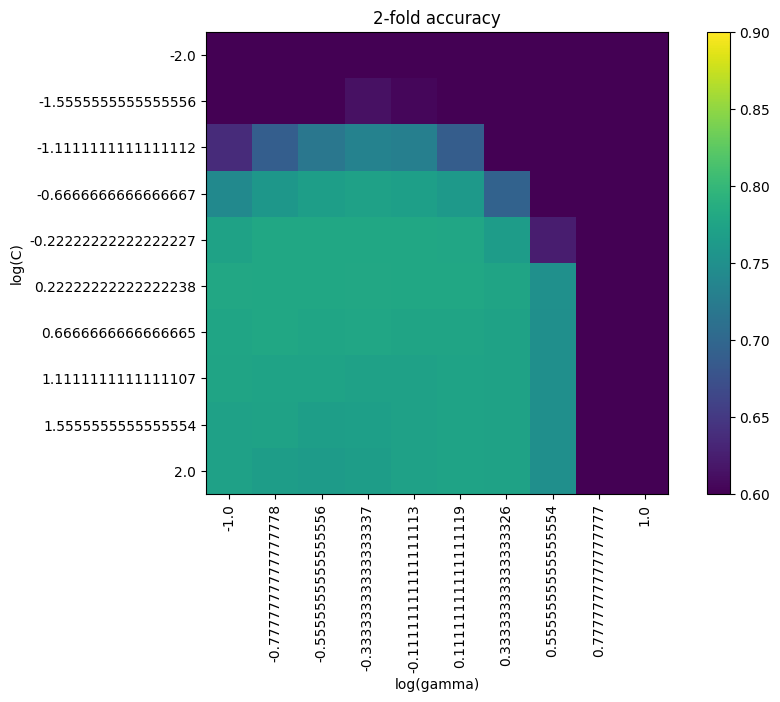

In [ ]:
vectorC = np.logspace(-2, 2, 10)
vectorG = np.logspace(-1, 1, 10)
kernel = 'rbf'
file_model = 'svm_model_tfidf_complex2.pkl'
model_svm(kernel, X_train_tfidf_complex, y_train, vectorC, vectorG, file_model)

# 6. MODELOS DEEP LEARNING.

## 6.1. Carga de librerias

In [6]:
!pip install keras
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 20.8 MB/s eta 0:00:00


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, GRU, SimpleRNN
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import pad_sequences


from sklearn.metrics import classification_report

## 6.2. Separación Train y validation.

In [10]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/keepcoding_NLP/sports_train2.csv')
test = pd.read_csv('/content/drive/MyDrive/keepcoding_NLP/sports_test2.csv')

In [11]:
from sklearn.model_selection import train_test_split
# Dividir train test
train2, val = train_test_split(train, test_size=0.2, stratify=train['sentimiento'], random_state=42)

## 6.3. Preparación de los datos.

In [12]:
X_train = train2['review']
y_train = train2['sentimiento']
X_val = val['review']
y_val = val['sentimiento']
X_test = test['review']
y_test = test['sentimiento']


In [ ]:
# Realizamos un estudio de las palabras de las reviews para determinar el número de neuronas

def calculate_max_mean(X_train):
    max_length = 0
    lengths = []

    for review in X_train:
        length = len(review.split())  # Suponiendo que las reviews son strings, calcular longitud en palabras
        lengths.append(length)
        if length > max_length:
            max_length = length

    mean_length = sum(lengths) / len(lengths) if lengths else 0

    return max_length, mean_length

# Calcular los valores de longitud máxima y media
max_length, mean_length = calculate_max_mean(X_train)

print('La longitud máxima de las reviews es:', max_length)
print('La media de palabras por review es:', mean_length)

La longitud máxima de las reviews es: 1241
La media de palabras por review es: 23.516950100693666


## 6.4. Realizamos padding con el maximo palabras seleccionado.

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pandas as pd

# Definir el número máximo de palabras y la longitud máxima de las secuencias
max_words = 1000
maxlen = 100

# Crear el tokenizador y ajustarlo a los datos de entrenamiento
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

# Convertir los textos a secuencias de enteros
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_val_sequences = tokenizer.texts_to_sequences(X_val)

# Padrear las secuencias para que todas tengan la misma longitud
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen)
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen)
X_val_padded = pad_sequences(X_val_sequences, maxlen = maxlen)

# Convertir las etiquetas a arrays de NumPy (si no lo están ya)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

# Imprimir los resultados para verificar
print("X_train_padded shape:", X_train_padded.shape)
print("X_test_padded shape:", X_test_padded.shape)
print('X_val_padded shape:', X_val_padded.shape)

print("y_train:", y_train)
print("y_test:", y_test)
print('y_val: ', y_val)


In [ ]:
# Guardar los datos paddeados
np.save('/content/drive/MyDrive/keepcoding_NLP/X_train_padded.npy', X_train_padded)
np.save('/content/drive/MyDrive/keepcoding_NLP/X_test_padded.npy', X_test_padded)
np.save('/content/drive/MyDrive/keepcoding_NLP/X_val_padded.npy', X_val_padded)

# Guardar las etiquetas
np.save('/content/drive/MyDrive/keepcoding_NLP/y_train_padded.npy', y_train)
np.save('/content/drive/MyDrive/keepcoding_NLP/y_test_padded.npy', y_test)
np.save('/content/drive/MyDrive/keepcoding_NLP/y_val_padded.npy', y_val)

## 6.5. Funcion entrenamiento LSTM

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

def train_lstm(X_train, y_train, X_val, y_val, batch_size,  learning_rate, lr_decay, num_epochs, model_checkpoint_path):
    vocabulary_size = 1000
    embedding_size = 32
    max_words = 100
    # Callback earlyStopping
    earlyStopping_callback = tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        min_delta=0.01,
        patience=5
    )

    # Callback ModelCheckpoint
    modelCheckpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=model_checkpoint_path,
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=False,
        verbose=1
    )

    model = Sequential()
    model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
    model.add(LSTM(512))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    print(model.summary())

    print("[INFO]: Entrenando red neuronal...")

    lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
        initial_learning_rate=learning_rate,
        decay_steps=1000,
        decay_rate=lr_decay
    )

    model.compile(loss='binary_crossentropy',
                  optimizer=Adam(learning_rate=lr_schedule),
                  metrics=['accuracy'])

    H = model.fit(X_train, y_train,
                  validation_data=(X_val, y_val),
                  batch_size=batch_size, epochs=num_epochs,
                  callbacks=[earlyStopping_callback, modelCheckpoint_callback])

    # Evaluate the model
    print("[INFO]: Evaluando red neuronal...")
    predsTrain = model.predict(X_train, batch_size=batch_size)
    predsVal = model.predict(X_val, batch_size=batch_size)
    predictions_train = (predsTrain > 0.5).astype(int)
    predictions_val = (predsVal > 0.5).astype(int)

    print('Resultados en Train')
    print(classification_report(y_train, predictions_train, digits=3))

    print('Resultados en validation')
    print(classification_report(y_val, predictions_val, digits=3))

    # Muestro gráfica de accuracy y losses
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, len(H.history["loss"])), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, len(H.history["val_loss"])), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, len(H.history["accuracy"])), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, len(H.history["val_accuracy"])), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
    plt.show()



### 6.5.1. Entrenamiento del modelo

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 100, 32)           32000     
                                                                 
 lstm_10 (LSTM)              (None, 512)               1116160   
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 1)                 513       
                                                                 
Total params: 1148673 (4.38 MB)
Trainable params: 1148673 (4.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
[INFO]: Entrenando red neuronal...
Epoch 1/500
5/5 [==============================] - ETA: 0s - loss: 0.6907 - accuracy: 0.5408
Epoch 1: val_l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 7s 1s/step - loss: 0.6907 - accuracy: 0.5408 - val_loss: 0.7055 - val_accuracy: 0.5308
Epoch 2/500
5/5 [==============================] - ETA: 0s - loss: 0.6939 - accuracy: 0.5157
Epoch 2: val_loss improved from 0.70548 to 0.68811, saving model to /content/drive/MyDrive/keepcoding_NLP/best_model_lstm.h5
5/5 [==============================] - 4s 784ms/step - loss: 0.6939 - accuracy: 0.5157 - val_loss: 0.6881 - val_accuracy: 0.5169
Epoch 3/500
5/5 [==============================] - ETA: 0s - loss: 0.6875 - accuracy: 0.5170
Epoch 3: val_loss improved from 0.68811 to 0.68646, saving model to /content/drive/MyDrive/keepcoding_NLP/best_model_lstm.h5
5/5 [==============================] - 4s 788ms/step - loss: 0.6875 - accuracy: 0.5170 - val_loss: 0.6865 - val_accuracy: 0.5169
Epoch 4/500
5/5 [==============================] - ETA: 0s - loss: 0.6851 - accuracy: 0.5196
Epoch 4: val_loss improved from 0.68646 to 0.68263, saving model to /content/drive/MyDr

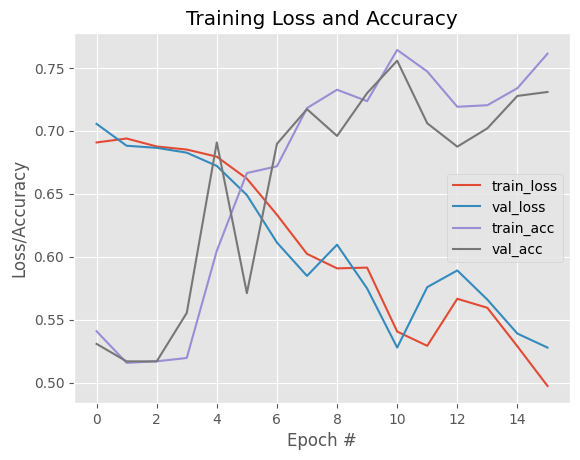

In [ ]:
batch_size = 4096
num_epochs = 500
learning_rate = 0.001
lr_decay = 0.01
model_checkpoint_path = '/content/drive/MyDrive/keepcoding_NLP/best_model_lstm.h5'
train_lstm(X_train_padded, y_train, X_val_padded, y_val, batch_size, learning_rate, lr_decay, num_epochs, model_checkpoint_path)


## 6.6. Funcion entrenamiento GRU

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

def train_gru(X_train, y_train, X_val, y_val, batch_size,  learning_rate, lr_decay, num_epochs, model_checkpoint_path):
    vocabulary_size = 1000
    embedding_size = 32
    max_words = 100
    # Callback earlyStopping
    earlyStopping_callback = tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        min_delta=0.01,
        patience=5
    )

    # Callback ModelCheckpoint
    modelCheckpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=model_checkpoint_path,
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=False,
        verbose=1
    )

    model = Sequential()
    model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
    model.add(GRU(512))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    print(model.summary())

    print("[INFO]: Entrenando red neuronal...")

    lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
        initial_learning_rate=learning_rate,
        decay_steps=1000,
        decay_rate=lr_decay
    )

    model.compile(loss='binary_crossentropy',
                  optimizer=Adam(learning_rate=lr_schedule),
                  metrics=['accuracy'])

    H = model.fit(X_train, y_train,
                  validation_data=(X_val, y_val),
                  batch_size=batch_size, epochs=num_epochs,
                  callbacks=[earlyStopping_callback, modelCheckpoint_callback])

    # Evaluate the model
    print("[INFO]: Evaluando red neuronal...")
    predsTrain = model.predict(X_train, batch_size=batch_size)
    predsVal = model.predict(X_val, batch_size=batch_size)
    predictions_train = (predsTrain > 0.5).astype(int)
    predictions_val = (predsVal > 0.5).astype(int)

    print('Resultados en Train')
    print(classification_report(y_train, predictions_train, digits=3))

    print('Resultados en validation')
    print(classification_report(y_val, predictions_val, digits=3))

    # Muestro gráfica de accuracy y losses
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, len(H.history["loss"])), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, len(H.history["val_loss"])), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, len(H.history["accuracy"])), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, len(H.history["val_accuracy"])), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
    plt.show()

### 6.6.1. Entrenamiento del modelo

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_21 (Embedding)    (None, 100, 32)           32000     
                                                                 
 gru_4 (GRU)                 (None, 512)               838656    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 1)                 513       
                                                                 
Total params: 871169 (3.32 MB)
Trainable params: 871169 (3.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
[INFO]: Entrenando red neuronal...
Epoch 1/500
5/5 [==============================] - ETA: 0s - loss: 0.6915 - accuracy: 0.5216
Epoch 1: val_los

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 8s 1s/step - loss: 0.6915 - accuracy: 0.5216 - val_loss: 0.6881 - val_accuracy: 0.5187
Epoch 2/500
5/5 [==============================] - ETA: 0s - loss: 0.6830 - accuracy: 0.5565
Epoch 2: val_loss improved from 0.68811 to 0.67283, saving model to /content/drive/MyDrive/keepcoding_NLP/best_model_gru.h5
5/5 [==============================] - 3s 674ms/step - loss: 0.6830 - accuracy: 0.5565 - val_loss: 0.6728 - val_accuracy: 0.5849
Epoch 3/500
5/5 [==============================] - ETA: 0s - loss: 0.6656 - accuracy: 0.5911
Epoch 3: val_loss improved from 0.67283 to 0.64788, saving model to /content/drive/MyDrive/keepcoding_NLP/best_model_gru.h5
5/5 [==============================] - 3s 666ms/step - loss: 0.6656 - accuracy: 0.5911 - val_loss: 0.6479 - val_accuracy: 0.6274
Epoch 4/500
5/5 [==============================] - ETA: 0s - loss: 0.6429 - accuracy: 0.6568
Epoch 4: val_loss improved from 0.64788 to 0.63182, saving model to /content/drive/MyDriv

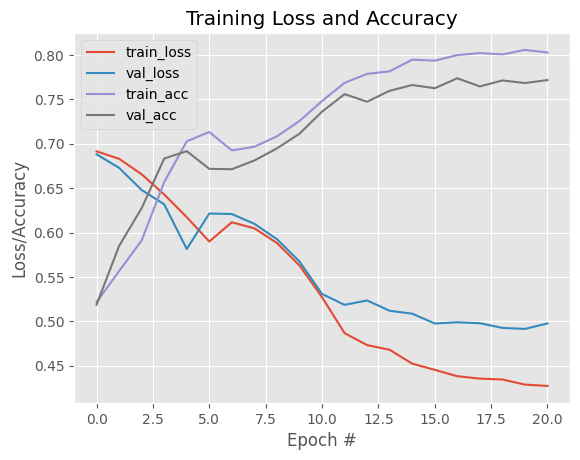

In [ ]:
batch_size = 4096
num_epochs = 500
learning_rate = 0.001
lr_decay = 0.001
model_checkpoint_path = '/content/drive/MyDrive/keepcoding_NLP/best_model_gru.h5'
train_gru(X_train_padded, y_train, X_val_padded, y_val, batch_size, learning_rate, lr_decay, num_epochs, model_checkpoint_path)


## 6.7. Funcion entrenamiento RNN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

def train_rnn_simple(X_train, y_train, X_val, y_val, batch_size,  learning_rate, lr_decay, num_epochs, model_checkpoint_path):
    vocabulary_size = 1000
    embedding_size = 32
    max_words = 100
    # Callback earlyStopping
    earlyStopping_callback = tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        min_delta=0.01,
        patience=5
    )

    # Callback ModelCheckpoint
    modelCheckpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=model_checkpoint_path,
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=False,
        verbose=1
    )

    model = Sequential()
    model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
    model.add(SimpleRNN(512))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    print(model.summary())

    print("[INFO]: Entrenando red neuronal...")

    lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
        initial_learning_rate=learning_rate,
        decay_steps=1000,
        decay_rate=lr_decay
    )

    model.compile(loss='binary_crossentropy',
                  optimizer=Adam(learning_rate=lr_schedule),
                  metrics=['accuracy'])

    H = model.fit(X_train, y_train,
                  validation_data=(X_val, y_val),
                  batch_size=batch_size, epochs=num_epochs,
                  callbacks=[earlyStopping_callback, modelCheckpoint_callback])

    # Evaluate the model
    print("[INFO]: Evaluando red neuronal...")
    predsTrain = model.predict(X_train, batch_size=batch_size)
    predsVal = model.predict(X_val, batch_size=batch_size)
    predictions_train = (predsTrain > 0.5).astype(int)
    predictions_val = (predsVal > 0.5).astype(int)

    print('Resultados en Train')
    print(classification_report(y_train, predictions_train, digits=3))

    print('Resultados en validation')
    print(classification_report(y_val, predictions_val, digits=3))

    # Muestro gráfica de accuracy y losses
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, len(H.history["loss"])), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, len(H.history["val_loss"])), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, len(H.history["accuracy"])), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, len(H.history["val_accuracy"])), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
    plt.show()

### 6.7.1. Entrenamiento del modelo

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_27 (Embedding)    (None, 100, 32)           32000     
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 512)               279040    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_27 (Dense)            (None, 1)                 513       
                                                                 
Total params: 311553 (1.19 MB)
Trainable params: 311553 (1.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
[INFO]: Entrenando red neuronal...
Epoch 1/500
5/5 [==============================] - ETA: 0s - loss: 2.1540 - accuracy: 0.4801
Epoch 1: val_los

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 3s 407ms/step - loss: 2.1540 - accuracy: 0.4801 - val_loss: 0.8344 - val_accuracy: 0.4831
Epoch 2/500
5/5 [==============================] - ETA: 0s - loss: 1.3894 - accuracy: 0.4960
Epoch 2: val_loss improved from 0.83441 to 0.70580, saving model to /content/drive/MyDrive/keepcoding_NLP/best_model_rnn.h5
5/5 [==============================] - 1s 278ms/step - loss: 1.3894 - accuracy: 0.4960 - val_loss: 0.7058 - val_accuracy: 0.4831
Epoch 3/500
5/5 [==============================] - ETA: 0s - loss: 0.8126 - accuracy: 0.4968
Epoch 3: val_loss did not improve from 0.70580
5/5 [==============================] - 1s 267ms/step - loss: 0.8126 - accuracy: 0.4968 - val_loss: 0.7108 - val_accuracy: 0.5164
Epoch 4/500
5/5 [==============================] - ETA: 0s - loss: 0.7739 - accuracy: 0.5057
Epoch 4: val_loss did not improve from 0.70580
5/5 [==============================] - 1s 270ms/step - loss: 0.7739 - accuracy: 0.5057 - val_loss: 0.7174 - val_accu

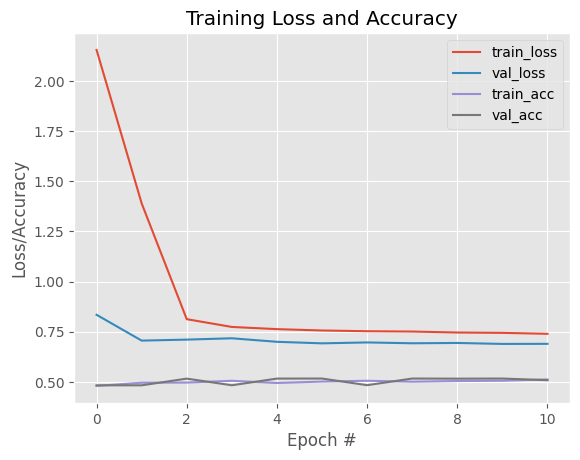

In [ ]:
batch_size = 4096
num_epochs = 500
learning_rate = 0.01
lr_decay = 0.001
model_checkpoint_path = '/content/drive/MyDrive/keepcoding_NLP/best_model_rnn.h5'
train_rnn_simple(X_train_padded, y_train, X_val_padded, y_val, batch_size, learning_rate, lr_decay, num_epochs, model_checkpoint_path)


## 6.8. Funcion RNN+wrod2vec

### 6.8.1. Carga librerias

In [1]:
import numpy as np
import pandas as pd
import gensim
import multiprocessing as mp

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    Embedding,
    LSTM,
)
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.preprocessing import LabelEncoder

### 6.8.2. Parámetros WORD2VEC

In [2]:
# Parámetros del WORD2VEC
W2V_SIZE = 100
W2V_WINDOW = 7
W2V_EPOCH = 5 #
W2V_MIN_COUNT = 2

# KERAS
SEQUENCE_LENGTH = 500

### 6.8.3. Funcion para generar un tokenizador

In [3]:
def generate_tokenizer(train_df):
  #generamos un identificador único para cada una de las palabras
  #creamos el vocabulario (tenemos palabra y número)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(train_df)
    vocab_size = len(tokenizer.word_index) + 1
    print(f"Total words: {vocab_size}")
    return tokenizer, vocab_size

### 6.8.4. Función para generar Word2vec.

In [4]:
def generate_word2vec(train_df):

    documents = [_text.split() for _text in train_df.review]
    w2v_model = gensim.models.word2vec.Word2Vec(
        vector_size=W2V_SIZE,
        window=W2V_WINDOW,
        min_count=W2V_MIN_COUNT,
        workers=mp.cpu_count(),
    )
    w2v_model.build_vocab(documents)

    words = w2v_model.wv.key_to_index.keys()
    vocab_size = len(words)
    print(f"Vocab size: {vocab_size}")
    w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

    return w2v_model

### 6.8.5. Generar capa de embeddings

In [5]:
# Generamos la capa de embeddings

def generate_embedding(word2vec_model, vocab_size, tokenizer):

    embedding_matrix = np.zeros((vocab_size, W2V_SIZE))

    for word, i in tokenizer.word_index.items():
        if word in word2vec_model.wv:
            embedding_matrix[i] = word2vec_model.wv[word]
    return Embedding(
        vocab_size,
        W2V_SIZE,
        weights=[embedding_matrix],
        input_length=SEQUENCE_LENGTH,

        trainable=False,
    )



### 6.8.6. Tratamiento de datos

In [ ]:
X_train_words = pd.DataFrame(X_train, columns=["review"])
X_test_words = pd.DataFrame(X_test, columns=["review"])
X_val_words = pd.DataFrame(X_val, columns=['review'])

In [ ]:
X_train_words.head()

,review
9417,spout dribble form good seal buy
4991,iwb leather holster glock g43 comfortable carr...
21748,work pleased
3212,useless fit mallet putter stretch nike method ...
13721,horn loud border irritate sure motorist attention


### 6.8.7. Entrenamiento modelo

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

vocabulary_size = 1000
embedding_size = 32
max_words = 500
batch_size = 32
num_epochs = 10
learning_rate = 0.001
lr_decay = 0.001
model_checkpoint_path = '/content/drive/MyDrive/keepcoding_NLP/best_model_rnnw2v.h5'

# Callback earlyStopping
earlyStopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.01,
    patience=2
)

# Callback ModelCheckpoint
modelCheckpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_checkpoint_path,
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)
word2vec_model = generate_word2vec(X_train_words)
tokenizer, vocab = generate_tokenizer(X_train_words.review)
embedding_layer = generate_embedding(word2vec_model, vocab, tokenizer)

X_train_words = pad_sequences(tokenizer.texts_to_sequences(X_train_words.review), maxlen=max_words)
X_test_words = pad_sequences(tokenizer.texts_to_sequences(X_test_words.review), maxlen=max_words)
X_val_words = pad_sequences(tokenizer.texts_to_sequences(X_val_words.review), maxlen=max_words)

model = Sequential()
model.add(embedding_layer)
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

print(model.summary())

print("[INFO]: Entrenando red neuronal...")

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=learning_rate,
    decay_steps=1000,
    decay_rate=lr_decay
)

optimizer = Adam(learning_rate=lr_schedule)

model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

H = model.fit(X_train_words, y_train,
              validation_data=(X_val_words, y_val),
              batch_size=batch_size, epochs=num_epochs,
              callbacks=[earlyStopping_callback, modelCheckpoint_callback])






Vocab size: 9537
Total words: 17250


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 100)          1725000   
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1805501 (6.89 MB)
Trainable params: 80501 (314.46 KB)
Non-trainable params: 1725000 (6.58 MB)
_________________________________________________________________
None
[INFO]: Entrenando red neuronal...
Epoch 1/10
559/559 [==============================] - ETA: 0s - loss: 0.5565 - accuracy: 0.7140
Epoch 1: val_loss improved from inf to 0.52398, saving model to /content/drive/MyDrive/keepcoding_NLP/best_model_rnnw2v.h5
559/559 [========

He tenido muchos problemas de recursos, quedarme sin GPU, llenar la RAM, a veces se quedaba parado sin más, he decido bajar epochs, disminuir el batch size y dejarlo con este entrenamiento que no es mejor.

Con más tiempo y recursos seguro que podemos mejorarlo.

In [ ]:
from tensorflow.keras.models import load_model

# Cargar el modelo
model = load_model('/content/drive/MyDrive/keepcoding_NLP/best_model_rnnw2v.h5')


[INFO]: Evaluando red neuronal...
140/140 [==============================] - 20s 140ms/step
Resultados en Train
              precision    recall  f1-score   support

           0      0.766     0.749     0.757      9241
           1      0.738     0.755     0.746      8635

    accuracy                          0.752     17876
   macro avg      0.752     0.752     0.752     17876
weighted avg      0.752     0.752     0.752     17876

Resultados en validation
              precision    recall  f1-score   support

           0      0.759     0.733     0.746      2310
           1      0.725     0.750     0.737      2159

    accuracy                          0.742      4469
   macro avg      0.742     0.742     0.741      4469
weighted avg      0.742     0.742     0.742      4469



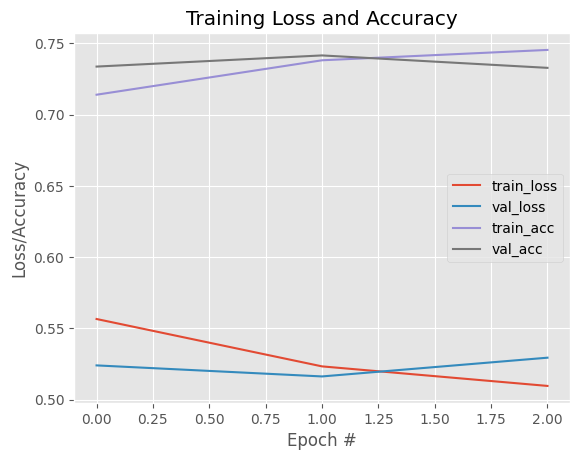

In [ ]:
# Evaluate the model
print("[INFO]: Evaluando red neuronal...")
predsTrain = model.predict(X_train_words, batch_size=batch_size)
predsVal = model.predict(X_val_words, batch_size=batch_size)
predictions_train = (predsTrain > 0.5).astype(int)
predictions_val = (predsVal > 0.5).astype(int)

print('Resultados en Train')
print(classification_report(y_train, predictions_train, digits=3))

print('Resultados en validation')
print(classification_report(y_val, predictions_val, digits=3))

# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, len(H.history["loss"])), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, len(H.history["val_loss"])), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, len(H.history["accuracy"])), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, len(H.history["val_accuracy"])), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

## 6.9. MODELO BERT

### 6.9.1 Carga de librerias

In [5]:
! pip install --force-reinstall transformers[tf-cpu] tensorflow==2.7.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 19.4 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement tensorflow==2.7.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1)
ERROR: No matching distribution found for tensorflow==2.7.0


In [6]:
!pip install -U transformers[torch] accelerate


  Using cached transformers-4.42.3-py3-none-any.whl (9.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 4.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (

In [4]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 2

In [2]:
# Conectar con el almacenamiento de GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 6.9.2 Entrenamiento modelo

In [7]:
from transformers import BertTokenizerFast, DataCollatorWithPadding, BertForSequenceClassification, Trainer, TrainingArguments, AdamW
import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import Dataset
import torch

# Load tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-cased')

# Load datasets
train = pd.read_csv('/content/drive/MyDrive/keepcoding_NLP/sports_train2.csv')

# Split train/val datasets
train2, val = train_test_split(train, test_size=0.2, stratify=train['sentimiento'], random_state=42)

# Convert to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train2)
val_dataset = Dataset.from_pandas(val)

# Tokenize function
def tokenize_function(examples):
    return tokenizer(examples['review'], padding='max_length', truncation=True, max_length=512)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)


# Rename label column to 'labels'
train_dataset = train_dataset.rename_column('sentimiento', 'labels')
val_dataset = val_dataset.rename_column('sentimiento', 'labels')

# Set format for PyTorch
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

# Initialize model
model = BertForSequenceClassification.from_pretrained('bert-base-cased', num_labels=2)

# Define training arguments
training_args = TrainingArguments(
    output_dir='data/out',           # Output directory for the model predictions and checkpoints
    overwrite_output_dir=True,       # Overwrite the content of the output directory
    per_device_train_batch_size=16,  # Batch size for training
    per_device_eval_batch_size=16,   # Batch size for evaluation
    learning_rate=5e-5,              # Learning rate
    num_train_epochs=3,              # Total number of training epochs
    evaluation_strategy="epoch"      # Evaluate at the end of each epoch
)

# Initialize optimizer
optimizer = AdamW(model.parameters(), lr=5e-5, weight_decay=0.01)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=DataCollatorWithPadding(tokenizer),
    optimizers=(optimizer, None)
)

torch.cuda.empty_cache()

# Train model
trainer.train()

# Evaluate model
eval_results = trainer.evaluate()

# Print evaluation results
print(f"Evaluation results: {eval_results}")

# Optional: Save the model
trainer.save_model("/content/drive/MyDrive/keepcoding_NLP/model_bert")


Map:   0%|          | 0/17876 [00:00<?, ? examples/s]

Map:   0%|          | 0/4469 [00:00<?, ? examples/s]

Map:   0%|          | 0/5587 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.478100,0.440503
2,0.352800,0.460630


Epoch,Training Loss,Validation Loss
1,0.478100,0.440503
2,0.352800,0.460630
3,0.227200,0.599081


Evaluation results: {'eval_loss': 0.5990814566612244, 'eval_runtime': 128.6465, 'eval_samples_per_second': 34.739, 'eval_steps_per_second': 2.177, 'epoch': 3.0}


He enfrentado el desafío de gestionar la GPU, la RAM y los tiempos de ejecución. Debido a esto, cada vez que intentaba finalizar el procesamiento de los datos del modelo, la ejecución se agotaba o no se completaba.

Las métricas en el notebook se calcularán únicamente con el conjunto de datos de prueba, que por su reducido tamaño es más factible comprobar la eficiencia del modelo.